Data Exploration and Visualization

The only files used in here are the statics ones:
1. final_covid_data.csv
2. final_rate_data.geojson

Importing Libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr, shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
import geopandas as gpd
import plotly.express as px
import folium
import statsmodels.api as sm
from folium import plugins
from scipy.stats import probplot, spearmanr

Loading in the data:

In [64]:
#do not run, this code has been updates. The final data set is now /Users/mona/final-project-monabr4/data/final_covid_data.csv

#state_covid_data = pd.read_csv('/Users/mona/final-project-monabr4/data/raw/state_covid_data.csv')
#population= pd.read_csv('/Users/mona/final-project-monabr4/data/raw/exported_statis_csv_shapefile/cleaned_population_data.csv')
#merged_data = pd.merge(population, state_covid_data, left_on='state', right_on='state')
#merged_data.drop(columns=['state'], inplace=True)
#merged_data

geojson_file = "/Users/mona/final-project-monabr4/data/processed/final_rate_data.geojson"
geo_data = gpd.read_file(geojson_file)

csv_file_path = "/Users/mona/final-project-monabr4/data/processed/final_covid_data.csv"
final_covid_data = pd.read_csv(csv_file_path)


Basic Exploratory Analysis 

In [65]:
#dimensions
csv_file_path = "/Users/mona/final-project-monabr4/data/processed/final_covid_data.csv"
final_covid_data = pd.read_csv(csv_file_path)
(final_covid_data)
dimensions = final_covid_data.shape
print("Dimensions of the DataFrame:", dimensions)

Dimensions of the DataFrame: (16455, 13)


In [33]:
#total count by state
csv_file_path = "/Users/mona/final-project-monabr4/data/processed/final_covid_data.csv"
final_covid_data = pd.read_csv(csv_file_path)

columns_to_sum = [
    'cases_new', 'cases_recovered', 'cases_active',
    'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly',
    'population', 'cases_new_per_capita', 'cases_recovered_per_capita', 'cases_active_per_capita'
]
sum_by_state = final_covid_data.groupby('state')[columns_to_sum].sum()
sum_by_state

,cases_new,cases_recovered,cases_active,cases_child,cases_adolescent,cases_adult,cases_elderly,population,cases_new_per_capita,cases_recovered_per_capita,cases_active_per_capita
state,,,,,,,,,,,
Johor,398177,391453,5479342,50628,22241,282143,37160,4147757000,0.105310,0.103532,1.449178
Kedah,318502,316271,2952455,48605,23915,207425,32207,2397054700,0.145761,0.144740,1.351176
Kelantan,260024,258613,2523843,43695,24831,158211,32229,2091649900,0.136374,0.135634,1.323671
Melaka,144807,142071,2043934,17966,9239,102905,14194,1023171900,0.155256,0.152322,2.191416
Negeri Sembilan,230892,229259,2498197,28845,16484,160604,19831,1238293600,0.204546,0.203100,2.213144
Pahang,182590,181071,2271894,31076,13044,119960,17047,1841533900,0.108769,0.107864,1.353365
Perak,238885,236452,2360652,28007,14808,158333,33610,2753799100,0.095162,0.094193,0.940386
Perlis,18989,18761,217534,2650,974,12718,2623,279625300,0.074496,0.073601,0.853409
Pulau Pinang,307436,305317,2719952,32203,16076,223805,34682,1945639200,0.173340,0.172145,1.533577


In [66]:
#subsetting by age group

subset_sum_by_state = sum_by_state.iloc[:, [3, 4, 5,6]] 
subset_sum_by_state

,cases_child,cases_adolescent,cases_adult,cases_elderly
state,,,,
Johor,50628,22241,282143,37160
Kedah,48605,23915,207425,32207
Kelantan,43695,24831,158211,32229
Melaka,17966,9239,102905,14194
Negeri Sembilan,28845,16484,160604,19831
Pahang,31076,13044,119960,17047
Perak,28007,14808,158333,33610
Perlis,2650,974,12718,2623
Pulau Pinang,32203,16076,223805,34682


In [35]:
#subset by covid cases 
subset_sum_by_state = sum_by_state.iloc[:, [0, 1, 2]] 
subset_sum_by_state

,cases_new,cases_recovered,cases_active
state,,,
Johor,398177,391453,5479342
Kedah,318502,316271,2952455
Kelantan,260024,258613,2523843
Melaka,144807,142071,2043934
Negeri Sembilan,230892,229259,2498197
Pahang,182590,181071,2271894
Perak,238885,236452,2360652
Perlis,18989,18761,217534
Pulau Pinang,307436,305317,2719952


In [67]:
#subset by rate
subset_sum_by_state = sum_by_state.iloc[:, [8]]  
subset_sum_by_state

,cases_new_per_capita
state,
Johor,0.105310
Kedah,0.145761
Kelantan,0.136374
Melaka,0.155256
Negeri Sembilan,0.204546
Pahang,0.108769
Perak,0.095162
Perlis,0.074496
Pulau Pinang,0.173340


In [47]:
#summary statistic 
summary_statistics = final_covid_data.groupby('state').describe().reset_index()
(summary_statistics)


state cases_new                                              \
                          count         mean          std  min   25%    50%   
0               Johor    1097.0   362.969006   592.857617  0.0  13.0   85.0   
1               Kedah    1097.0   290.339107   571.134591  0.0   9.0   62.0   
2            Kelantan    1097.0   237.031905   403.087527  0.0   2.0   45.0   
3              Melaka    1097.0   132.002735   180.079816  0.0   2.0   65.0   
4     Negeri Sembilan    1097.0   210.475843   343.032382  0.0  13.0   96.0   
5              Pahang    1097.0   166.444850   302.732132  0.0   2.0   38.0   
6               Perak    1097.0   217.762078   333.144511  0.0   8.0  104.0   
7              Perlis    1097.0    17.309936    41.710820  0.0   0.0    3.0   
8        Pulau Pinang    1097.0   280.251595   501.578454  0.0  12.0  112.0   
9               Sabah    1097.0   370.814038   717.827478  0.0  28.0  160.0   
10            Sarawak    1097.0   295.565178   613.734015  0.0   6.0   61.0   
11           Selangor    1097.0  1410.953510  2053.830068  0.0  84.0  730.0   
12         Terengganu    1097.0   121.165907   220.460198  0.0   1.0   22.0   
13  W.P. Kuala Lumpur    1097.0   426.457612   585.836934  0.0  30.0  257.0   
14     W.P. Putrajaya    1097.0    29.511395    39.342058  0.0   1.0   16.0   

                    cases_recovered  ... cases_recovered_per_capita            \
       75%      max           count  ...                        75%       max   
0    441.0   3238.0          1097.0  ...                   0.000107  0.001364   
1    263.0   3243.0          1097.0  ...                   0.000119  0.001542   
2    297.0   2135.0          1097.0  ...                   0.000149  0.001323   
3    182.0   1120.0          1097.0  ...                   0.000176  0.002270   
4    205.0   2115.0          1097.0  ...                   0.000183  0.002092   
5    200.0   2006.0          1097.0  ...                   0.000109  0.001839   
6    235.0   1713.0          1097.0  ...                   0.000097  0.000694   
7     12.0    321.0          1097.0  ...                   0.000047  0.001240   
8    243.0   2773.0          1097.0  ...                   0.000117  0.003960   
9    326.0   5565.0          1097.0  ...                   0.000093  0.002347   
10   292.0   5291.0          1097.0  ...                   0.000103  0.001687   
11  1448.0  11692.0          1097.0  ...                   0.000229  0.001893   
12   127.0   1283.0          1097.0  ...                   0.000086  0.001193   
13   515.0   4527.0          1097.0  ...                   0.000298  0.002548   
14    40.0    231.0          1097.0  ...                   0.000355  0.002100   

   cases_active_per_capita                                                    \
                     count      mean       std       min       25%       50%   
0                   1097.0  0.001321  0.001761  0.000000  0.000066  0.000656   
1                   1097.0  0.001232  0.002681 -0.000230  0.000008  0.000136   
2                   1097.0  0.001207  0.002002 -0.000009  0.000009  0.000245   
3                   1097.0  0.001998  0.002385  0.000000  0.000049  0.001749   
4                   1097.0  0.002017  0.003240  0.000000  0.000146  0.000858   
5                   1097.0  0.001234  0.002028  0.000000  0.000044  0.000444   
6                   1097.0  0.000857  0.001264  0.000000  0.000053  0.000456   
7                   1097.0  0.000778  0.001710  0.000000  0.000016  0.000188   
8                   1097.0  0.001398  0.002596 -0.000020  0.000063  0.000502   
9                   1097.0  0.001479  0.002091  0.000000  0.000180  0.001064   
10                  1097.0  0.001187  0.002598  0.000000  0.000031  0.000198   
11                  1097.0  0.002510  0.003689  0.000000  0.000087  0.001202   
12                  1097.0  0.000985  0.001672  0.000000  0.000026  0.000263   
13                  1097.0  0.002869  0.003748  0.000000  0.000271  0.001967   
14            

In [68]:
#looking for missing values
missing_values = final_covid_data.isna().sum()
print(missing_values)

Date                          0
state                         0
cases_new                     0
cases_recovered               0
cases_active                  0
cases_child                   0
cases_adolescent              0
cases_adult                   0
cases_elderly                 0
population                    0
cases_new_per_capita          0
cases_recovered_per_capita    0
cases_active_per_capita       0
dtype: int64


How does the distribution of COVID-19 cases across different age groups vary among states in Malaysia?

In [69]:
#Most Populated to Least Populates
population_mode_by_state = final_covid_data.groupby('state')['population'].agg(lambda x: x.mode().iloc[0]).reset_index()
ranked_states = population_mode_by_state.sort_values(by='population', ascending=False).reset_index(drop=True)
desired_order = ranked_states['state'].tolist()
print(desired_order)


['Selangor', 'Sabah', 'Johor', 'Sarawak', 'Perak', 'Kedah', 'Kelantan', 'W.P. Kuala Lumpur', 'Pulau Pinang', 'Pahang', 'Terengganu', 'Negeri Sembilan', 'Melaka', 'Perlis', 'W.P. Putrajaya']


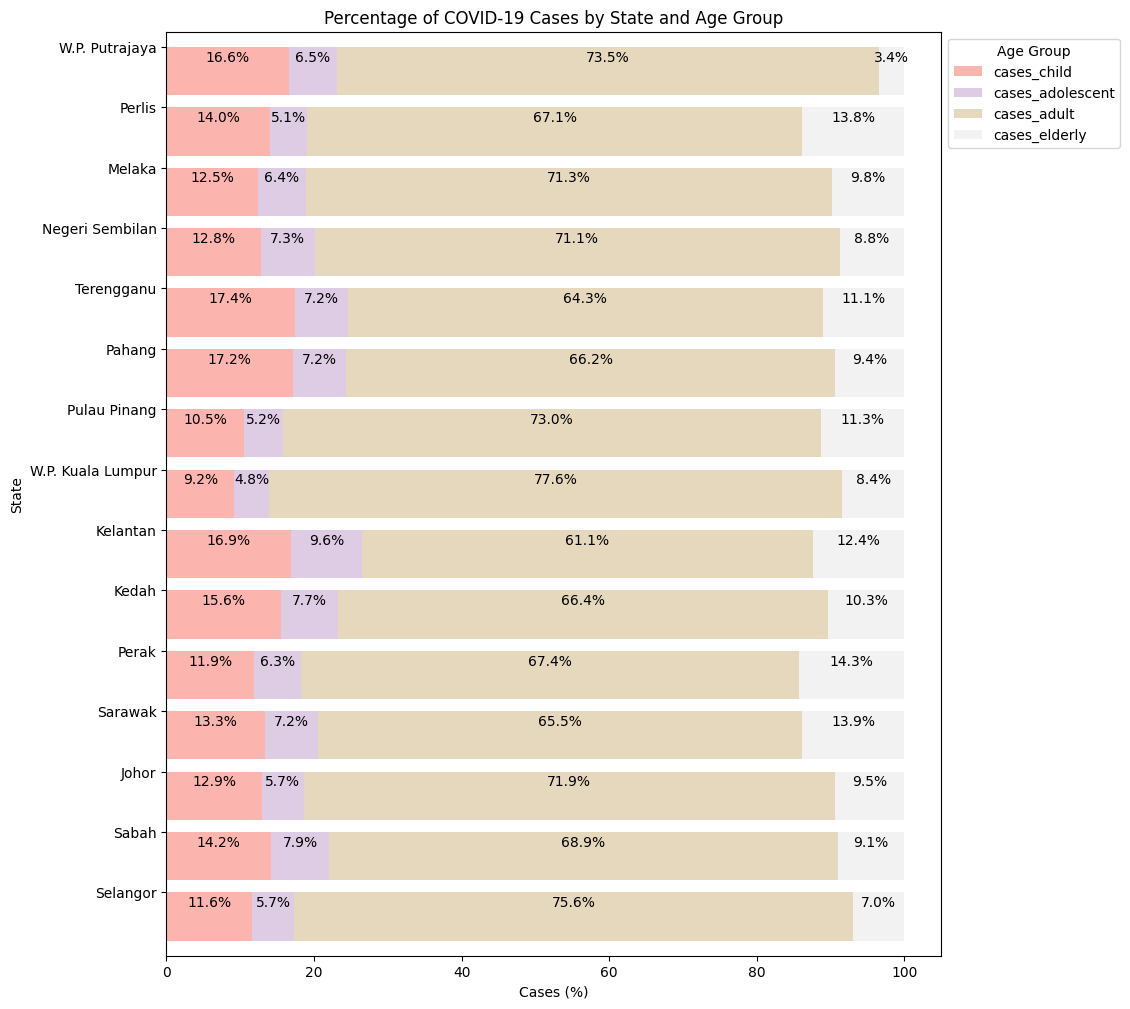

In [50]:
selected_columns = ['state', 'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']
selected_df = final_covid_data[selected_columns]
total_by_state = selected_df.groupby('state').sum()

desired_state_order = ['Selangor', 'Sabah', 'Johor', 'Sarawak', 'Perak', 'Kedah', 'Kelantan', 'W.P. Kuala Lumpur', 'Pulau Pinang', 'Pahang', 'Terengganu', 'Negeri Sembilan', 'Melaka', 'Perlis', 'W.P. Putrajaya']

total_by_state = total_by_state.reindex(desired_state_order)


total_by_state_percentage = total_by_state.div(total_by_state.sum(axis=1), axis=0) * 100


ax = total_by_state_percentage.plot(kind='barh', figsize=(10, 12), width=0.8, position=1, colormap='Pastel1', stacked=True)


plt.title('Percentage of COVID-19 Cases by State and Age Group')
plt.xlabel('Cases (%)')
plt.ylabel('State')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2., y + height / 2.),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('/Users/mona/final-project-monabr4/results/covid_percentage_by_state.png', bbox_inches='tight')




GRAPHING USING THE SHAPEFILE

How do COVID-19 incidence rates vary across different states in Malaysia?: Interactive Plot of New Covid Cases Over Time 

In [ ]:
#static is a screenshot of the HTML 

In [70]:
#geojson_file = "/Users/mona/final-project-monabr4/data/processed/final_malaysia_shapefile_data.geojson"
#gdf = gpd.read_file(geojson_file)
csv_file_path = "/Users/mona/final-project-monabr4/data/processed/final_covid_data.csv"
final_covid_data = pd.read_csv(csv_file_path)
(final_covid_data)

df = final_covid_data[['Date', 'state', 'cases_new']]
df['Date'] = pd.to_datetime(df['Date'])

grouped_data = df.groupby(['Date', 'state'])['cases_new'].sum().reset_index()

state_colors = {
    'Johor': 'red',
    'Kedah': 'blue',
    'Kelantan': 'green',
    'Melaka': 'purple',
    'Negeri Sembilan': 'orange',
    'Pahang': 'pink',
    'Perak': 'brown',
    'Perlis': 'gray',
    'Pulau Pinang': 'cyan',
    'Sabah': 'magenta',
    'Sarawak': 'yellow',
    'Selangor': 'lime',
    'Terengganu': 'teal',
    'W.P. Kuala Lumpur': 'olive',
    'W.P. Labuan': 'navy',
    'W.P. Putrajaya': 'maroon'
}

# Create an interactive line plot with custom colors
fig = px.line(grouped_data, x='Date', y='cases_new', color='state',
              title='COVID-19 Cases Over Time for Each State',
              labels={'cases_new': 'New Cases', 'Date': 'Date'},
              line_group='state',
              color_discrete_map=state_colors)

fig.write_html("/Users/mona/final-project-monabr4/results/interactive_new_cases_by_state.html")


/var/folders/bq/f4rm16jd49vd_3p_c51pml3r0000gn/T/ipykernel_56480/2418582085.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Are there significant disparities in the impact of the pandemic on various regions in terms of cases and recoveries?

In [71]:
geojson_file = "/Users/mona/final-project-monabr4/data/processed/final_rate_data.geojson"
geo_data = gpd.read_file(geojson_file)

m = folium.Map(location=[4.2105, 101.9758], zoom_start=6)

color_scale = folium.StepColormap(
    colors=['#f7f7f7', '#984ea3', '#4d004b'],
    vmin=geo_data['percentage_living'].min(),
    vmax=geo_data['percentage_living'].max(),
    caption='Percentage Living')

folium.GeoJson(
    geo_data,
    name='COVID-19 Information',
    style_function=lambda feature: {
        'fillColor': color_scale(feature['properties']['percentage_living']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    tooltip=folium.GeoJsonTooltip(
        fields=['name', 'cases_new', 'cases_recovered', 'percent_recovered', "percent_not_recovered", "percentage_living"],
        aliases=['State', 'Total Cases', 'Recovered', 'Percent Recovered', "Percent Not Recovered", "Percent of the population in Malaysia"],
        localize=True
    )
).add_to(m)


m.add_child(color_scale)

m.save("/Users/mona/final-project-monabr4/results/recovered_rate_map.html")


Is there a correlation between population density in different states and the rate of COVID-19 transmission?

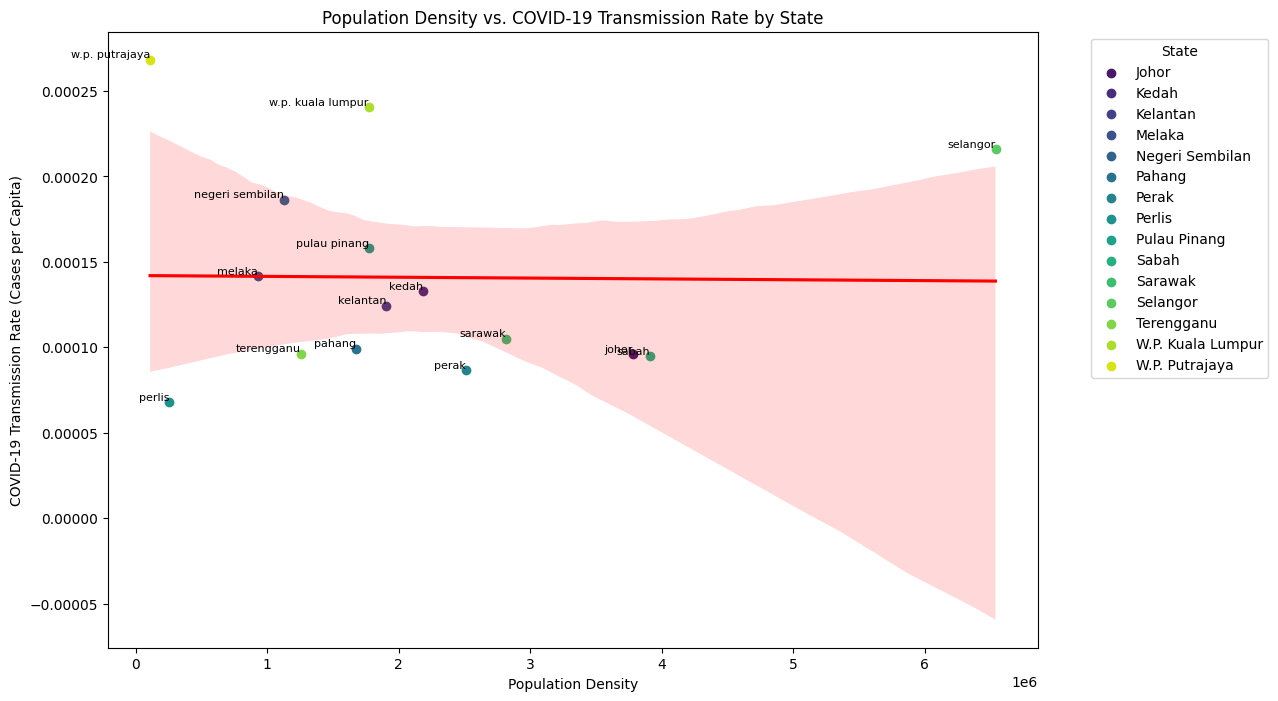

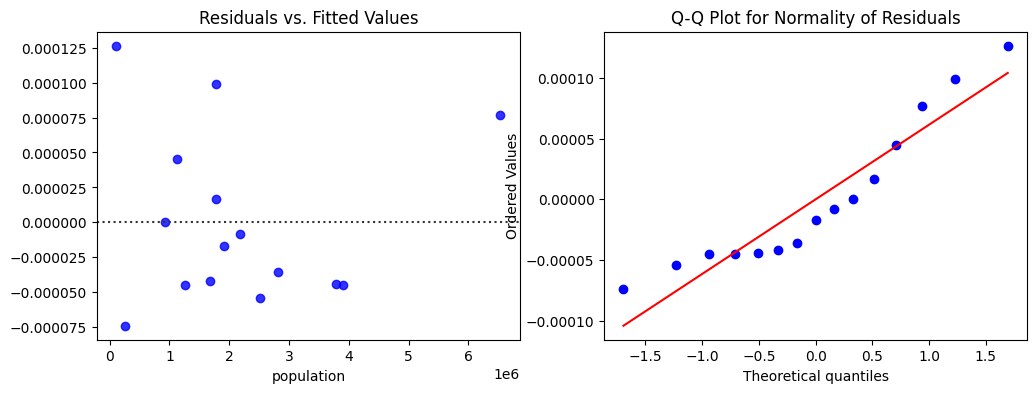

In [72]:
selected_columns = ['state', 'population', 'cases_new_per_capita']
data_to_plot = final_covid_data[selected_columns]

mean_data = data_to_plot.groupby('state').mean()

plt.figure(figsize=(12, 8))
palette = sns.color_palette('viridis', len(mean_data))

for i, (state, row) in enumerate(mean_data.iterrows()):
    color = palette[i]
    plt.scatter(row['population'], row['cases_new_per_capita'], color=color, marker='o', label=state)
    plt.text(row['population'], row['cases_new_per_capita'], state.lower(), fontsize=8, ha='right', va='bottom')

sns.regplot(x='population', y='cases_new_per_capita', data=mean_data, scatter=False, color='red')

plt.title('Population Density vs. COVID-19 Transmission Rate by State')
plt.xlabel('Population Density')
plt.ylabel('COVID-19 Transmission Rate (Cases per Capita)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig('/Users/mona/final-project-monabr4/results/scatter_plot.png')
plt.figure(figsize=(12, 4))

# Residuals vs. Fitted Values (Homoscedasticity)
plt.subplot(1, 2, 1)
residuals = mean_data['cases_new_per_capita'] - sm.OLS(mean_data['cases_new_per_capita'], sm.add_constant(mean_data['population'])).fit().predict(sm.add_constant(mean_data['population']))
sns.residplot(x=mean_data['population'], y=residuals, color='blue')
plt.title('Residuals vs. Fitted Values')

# Q-Q plot for Normality of Residuals
plt.subplot(1, 2, 2)
probplot(residuals, plot=plt)
plt.title('Q-Q Plot for Normality of Residuals')

plt.savefig('/Users/mona/final-project-monabr4/results/covid_plot_with_diagnostics.png')

plt.show()

Spearman's Correlation Results:
Spearman's Correlation Coefficient: -0.2071428571428571
P-value: 0.4588428049634703
The relationship is not statistically significant.


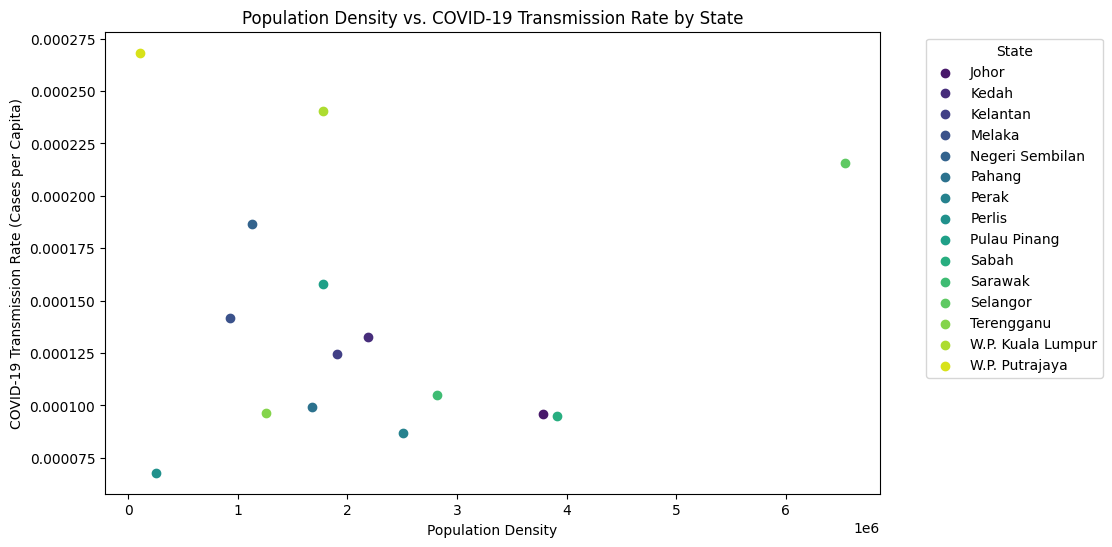

In [60]:
selected_columns = ['state', 'population', 'cases_new_per_capita']
data_to_plot = final_covid_data[selected_columns]

mean_data = data_to_plot.groupby('state').mean()

plt.figure(figsize=(10, 6))
palette = sns.color_palette('viridis', len(mean_data))

for i, (state, row) in enumerate(mean_data.iterrows()):
    color = palette[i]
    plt.scatter(row['population'], row['cases_new_per_capita'], color=color, marker='o', label=state)

plt.title('Population Density vs. COVID-19 Transmission Rate by State')
plt.xlabel('Population Density')
plt.ylabel('COVID-19 Transmission Rate (Cases per Capita)')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


spearman_corr, p_value_spearman = spearmanr(mean_data['population'], mean_data['cases_new_per_capita'])
print("Spearman's Correlation Results:")
print(f"Spearman's Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value_spearman}")

if p_value_spearman < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")
